# Neural Network Regression with TensorFlow Exercises

In [9]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

# import numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2.12.0


## Creating our regression dataset

In [52]:
# Creating data
X = np.linspace(0, 150, 101)

# Creating labels
y = X**(0.5)

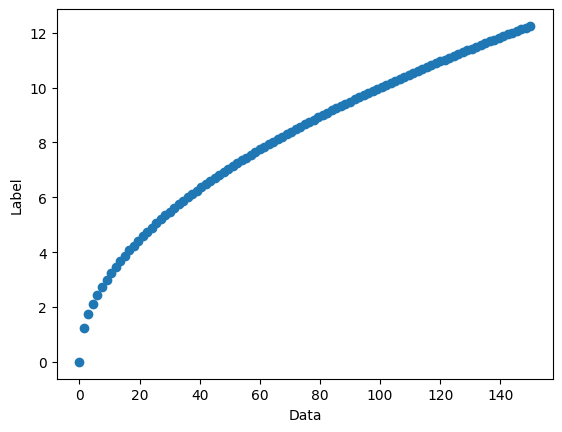

In [53]:
# Plot data
plt.scatter(X, y)
plt.xlabel('Data')
plt.ylabel('Label')
plt.show()

Let's add some noisy on our data and plot them again

In [54]:
# Creating noisy
noisy = np.random.randn(101)
noisy

array([ 0.15529576,  0.80220319, -1.03559883,  0.36933594, -1.2680428 ,
       -0.10271169, -1.39758226,  0.10108244, -0.66304533,  0.41210188,
       -0.67759626, -0.56603235,  2.03032559, -0.59829362, -1.61326277,
       -0.98085923,  1.89181839, -0.98322497,  0.74043946,  0.29457463,
        0.32958587, -1.43218492,  0.11293638,  2.25250886, -1.48078655,
       -1.46100809, -0.40255588, -1.13757397, -0.51430283,  1.91543192,
        0.43597489, -0.91834575,  0.72082048,  0.76891793,  2.0775867 ,
       -0.28409951,  0.17865756, -0.68552812,  0.61326746,  0.84842469,
        0.8129614 , -0.01958418,  0.05715142, -1.36900002,  0.72026973,
       -0.97753671,  0.11392371, -1.42235082,  1.22429812,  0.57647881,
        0.41112086, -0.76111592,  0.39472808,  0.82221406, -1.18906601,
       -0.65601028, -0.09643414, -0.18659982,  1.29974898, -0.3514364 ,
       -0.34076395, -0.59407823,  1.51311504, -2.79409885, -0.76656293,
        0.97102438,  0.04542425,  0.59636724, -0.34877724, -0.31

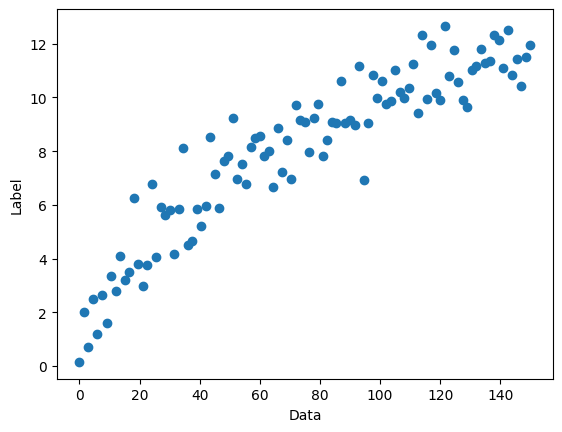

In [55]:
# Adding noisy on the data and plot again
y = y + noisy

# plot data again
plt.scatter(X, y)
plt.xlabel('Data')
plt.ylabel('Label')
plt.show()

In [56]:
# Let's turns numpy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)

Our data is ready for modeling now. Let's create a neural network with 4 dense layer.

## Building neural network model with 4 dense layer

Before the modelling, we need to split our data to train and test sets.

In [57]:
# Split data to train and test 
X_train = X[0:70]
X_test = X[70:]
y_train = y[0:70]
y_test = y[70:]

In [58]:
# Building neural network model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
3/3 [==============================] - 0s 7ms/step - loss: 100.9302 - mae: 100.9302
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 7.1534 - mae: 7.1534
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 3.3496 - mae: 3.3496
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 2.4259 - mae: 2.4259
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 2.6172 - mae: 2.6172
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5167 - mae: 1.5167
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 4.2217 - mae: 4.2217
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 2.1505 - mae: 2.1505
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 2.2169 - mae: 2.2169
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 2.6769 - mae: 2.6769
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 1.3

## Making predictions and evaluation our model

We fit our model and let's check the model predictions. How much good or bad our precitions?

In [59]:
# Model predictions
y_pred = model.predict(X_test)
print('Model predictions: ', '\n\n', tf.squeeze(y_pred))

# Actual values
print('Actual values: ', '\n\n', y_test)

1/1 [==============================] - 0s 60ms/step
Model predictions:  

 tf.Tensor(
[14.482338  14.673373  14.8644085 15.055444  15.246479  15.437513
 15.628549  15.819584  16.010616  16.201653  16.392689  16.583721
 16.774757  16.965792  17.156824  17.347862  17.538897  17.729933
 17.920967  18.112001  18.303036  18.49407   18.685106  18.87614
 19.067177  19.258213  19.449247  19.640284  19.831314  20.022352
 20.213387 ], shape=(31,), dtype=float32)
Actual values:  

 tf.Tensor(
[11.02021083 10.21870482  9.98467711 10.3317485  11.24997612  9.40139782
 12.30439321  9.93353275 11.935541   10.17863694  9.9029977  12.66070702
 10.81356547 11.76176955 10.56964352  9.90837331  9.65633357 11.0029334
 11.17677297 11.81928599 11.29344897 11.34539162 12.33696755 12.14245196
 11.09799687 12.5142582  10.84403486 11.41581784 10.4337484  11.49083699
 11.95171753], shape=(31,), dtype=float64)


Let's plot our predictions and data. It might help us more clear explanation.

In [18]:
# Creating a plotting function
def plot_prediction(train_data=X_train, train_labels=y_train, 
     test_data=X_test, test_labels=y_test, predictions=y_pred):
  
  '''Ploting train data, test data and compare predictions with actual values'''

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label='Test data')
  # Plot model in red
  plt.scatter(test_data, predictions, c='r', label='Prediction')
  # Show legend and plot
  plt.legend()
  plt.show()

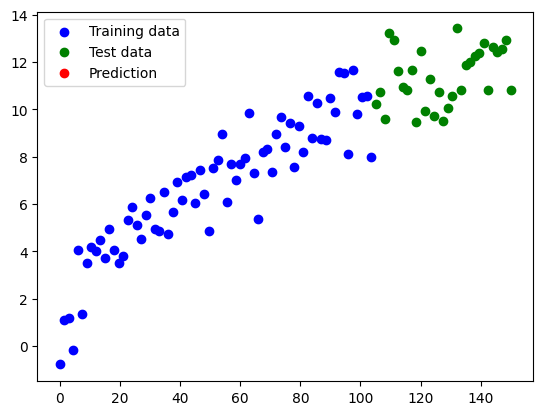

In [19]:
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=y_pred
                )

As you see, our model doesn't perform well. We should improve our model performance and it's predictions. 

## Improve the model

* Model_1: We will try larger model, which is one more layers and more neuron.
* Model_2: Changing the optimization function. At the first model we used SGD but we will try Adam.
* Model_3: Increasing and decreasing learning rate.
* Model_4: Increasing number of epochs. It means more longer train.

Using these 4 model, we will try to find out best model. Let's get started.

### Model_1: Adding one more layer to first model and increasing the number of neuron.

In [20]:
# Building neural network model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 74.4338 - mae: 74.4338
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 117532802257256448.0000 - mae: 117532802257256448.0000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: nan - mae: nan
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoc

We get nan in the progress bar after adding one more layers. Generally, it means overfitting occurs so let's stay with 4 dense layer and only increase the neurons.  

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 156.9420 - mae: 156.9420
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 59.2175 - mae: 59.2175
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 60.9219 - mae: 60.9219
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 5.4031 - mae: 5.4031
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 5.4855 - mae: 5.4855
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 3.2137 - mae: 3.2137
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 4.2041 - mae: 4.2041
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 2.7841 - mae: 2.7841
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 2.8585 - mae: 2.8585
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 2.7522 - mae: 2.7522
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss:

In [23]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.keras.losses.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

In [24]:
# Calculate evaluation metrics for model_1
print('Mean Absolute Error (MAE):', mae(y_test, model_1.predict(X_test, verbose=0)))
print('Mean Square Error (MSE):', mse(y_test, model_1.predict(X_test, verbose=0)))

Mean Absolute Error (MAE): 6.786245
Mean Square Error (MSE): 49.140335


1/1 [==============================] - 0s 21ms/step


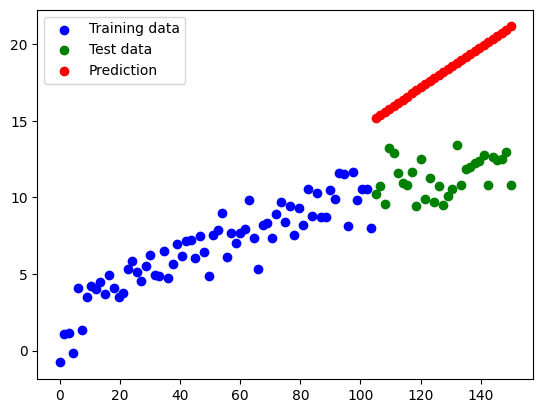

In [25]:
# Call plot_prediction function and see the predictions
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=model_1.predict(X_test)
                )

Increasing neurons doesn't perform well as we expect. Nearly, we get same results. So let's continue to second option, which is changing optimization function.

### Model_2: Changing optimization function. Trying Adam optimizer.

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 11.3712 - mae: 11.3712
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 14.2874 - mae: 14.2874
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 4.3056 - mae: 4.3056
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 8.9566 - mae: 8.9566
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 3.0114 - mae: 3.0114
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 6.8990 - mae: 6.8990
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 2.7588 - mae: 2.7588
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 5.7903 - mae: 5.7903
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 2.1117 - mae: 2.1117
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 3.8431 - mae: 3.8431
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 2.2

In [27]:
# Calculate evaluation metrics for model_2
print('Mean Absolute Error (MAE):', mae(y_test, model_2.predict(X_test, verbose=0)))
print('Mean Square Error (MSE):', mse(y_test, model_2.predict(X_test, verbose=0)))

Mean Absolute Error (MAE): 2.1280637
Mean Square Error (MSE): 5.718262


1/1 [==============================] - 0s 31ms/step


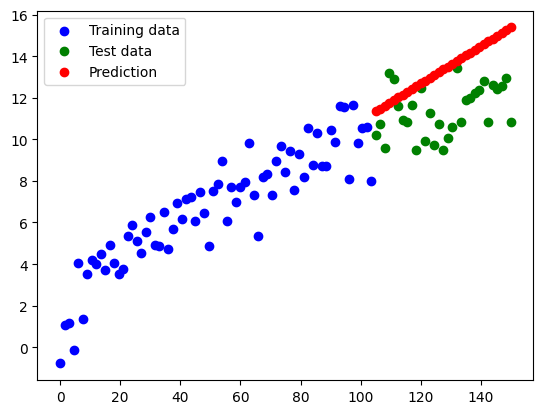

In [28]:
# Call plot_prediction function and see the predictions
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=model_2.predict(X_test)
                )

Woow. We are closer to actual values than before but still it is not enough. We need to improve more so let's go to third option, which is changing learning rate.

### Model_3: Changing learning rate

If you check the below link, you can see more details about Adam optimizer. The first parameter of Adam optimizer is learning rate and this parameter plays a big role in optimization. Adam optimizer's default learning rate value is 0.002. I will increase it to 0.01 and let's check together what will happen.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['mae']
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 157.7457 - mae: 157.7457
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 43.9499 - mae: 43.9499
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 30.0064 - mae: 30.0064
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 10.2098 - mae: 10.2098
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 10.5857 - mae: 10.5857
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 3.9305 - mae: 3.9305
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 3.0450 - mae: 3.0450
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 4.2674 - mae: 4.2674
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5978 - mae: 1.5978
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5419 - mae: 1.5419
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - l

In [30]:
# Calculate evaluation metrics for model_3
print('Mean Absolute Error (MAE):', mae(y_test, model_3.predict(X_test, verbose=0)))
print('Mean Square Error (MSE):', mse(y_test, model_3.predict(X_test, verbose=0)))

Mean Absolute Error (MAE): 1.6302012
Mean Square Error (MSE): 3.5342982


1/1 [==============================] - 0s 24ms/step


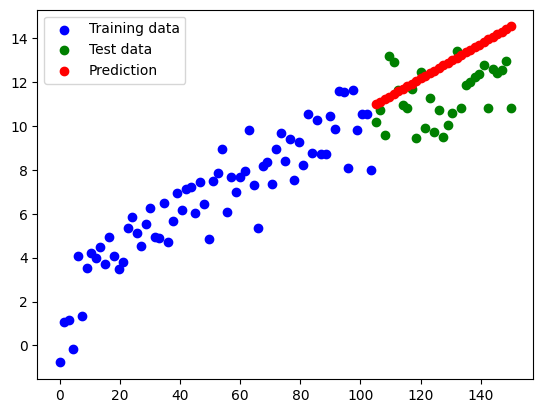

In [31]:
# Call plot_prediction function and see the predictions
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=model_3.predict(X_test)
                )

It looks really good but we have one more option is that fit longer mean that increasing epochs.

### Model_4: Increasing number of epochs. (Fit longer)

I will increse the epochs from the 100 to 300.

In [32]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['mae']
)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=300)

Epoch 1/300
3/3 [==============================] - 1s 7ms/step - loss: 135.0637 - mae: 135.0637
Epoch 2/300
3/3 [==============================] - 0s 5ms/step - loss: 46.2739 - mae: 46.2739
Epoch 3/300
3/3 [==============================] - 0s 6ms/step - loss: 13.4394 - mae: 13.4394
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 10.4338 - mae: 10.4338
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 2.9990 - mae: 2.9990
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 2.2119 - mae: 2.2119
Epoch 7/300
3/3 [==============================] - 0s 5ms/step - loss: 2.1696 - mae: 2.1696
Epoch 8/300
3/3 [==============================] - 0s 5ms/step - loss: 1.6746 - mae: 1.6746
Epoch 9/300
3/3 [==============================] - 0s 5ms/step - loss: 2.8992 - mae: 2.8992
Epoch 10/300
3/3 [==============================] - 0s 7ms/step - loss: 1.4136 - mae: 1.4136
Epoch 11/300
3/3 [==============================] - 0s 5ms/step - los

In [33]:
# Calculate evaluation metrics for model_1
print('Mean Absolute Error (MAE):', mae(y_test, model_4.predict(X_test, verbose=0)))
print('Mean Square Error (MSE):', mse(y_test, model_4.predict(X_test, verbose=0)))

Mean Absolute Error (MAE): 1.4240024
Mean Square Error (MSE): 2.7678158


1/1 [==============================] - 0s 22ms/step


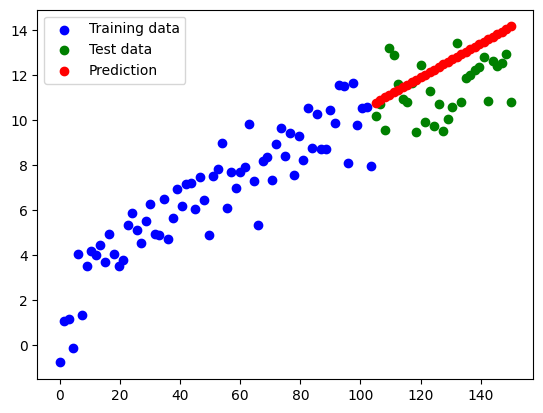

In [34]:
# Call plot_prediction function and see the predictions
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=model_4.predict(X_test)
                )

Increasing epochs from 100 to 300 doesn't perform well. We get same results like last model. Let's compare all model results. 

## Comparing models

In [35]:
# Model results
results = [['model_1', mae(y_test, model_1.predict(X_test, verbose=0)), mse(y_test, model_1.predict(X_test, verbose=0))],
           ['model_2', mae(y_test, model_2.predict(X_test, verbose=0)), mse(y_test, model_2.predict(X_test, verbose=0))],
           ['model_3', mae(y_test, model_3.predict(X_test, verbose=0)), mse(y_test, model_3.predict(X_test, verbose=0))],
           ['model_4', mae(y_test, model_4.predict(X_test, verbose=0)), mse(y_test, model_4.predict(X_test, verbose=0))]]

# Create a dataframe
results_df = pd.DataFrame(results, columns=['models', 'mae', 'mse'])
results_df

,models,mae,mse
0,model_1,6.786245,49.140335
1,model_2,2.128064,5.718262
2,model_3,1.630201,3.534298
3,model_4,1.424002,2.767816


## Real Data - Concrete Dataset

Context

This data set aims to provide a start up for the ones who just started off with deep learning and act as a benchmark.
Content

The feature set includes:

* Cement
* Blast Furnace Slag
* Fly Ash
* Water
* Super-plasticizer
* Coarse Aggregate
* Fine Aggregate
* Age

The target set is: Strength of the Cement


In [38]:
# load dataset
df = pd.read_csv('/content/concrete_data.xls')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [39]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [40]:
# Check missing values
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

That's good there is no missing values

In [41]:
# Scaling
scaler = MinMaxScaler()

for col in df.columns[:-1]:
  df[col] = scaler.fit_transform(df[[col]])

In [48]:
# Check first 5 rows after scaling
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,79.99
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,61.89
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,40.27
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,41.05
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,44.30


In [43]:
# Features and labels
X = df.drop('Strength', axis=1)
y = df['Strength']

In [44]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
strength_model =  tf.keras.Sequential([
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
strength_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
history = strength_model.fit(X_train, y_train, epochs=500, verbose=0)

In [46]:
# Evaluate the model
strength_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 3.5554 - mae: 3.5554


[3.5553860664367676, 3.5553860664367676]

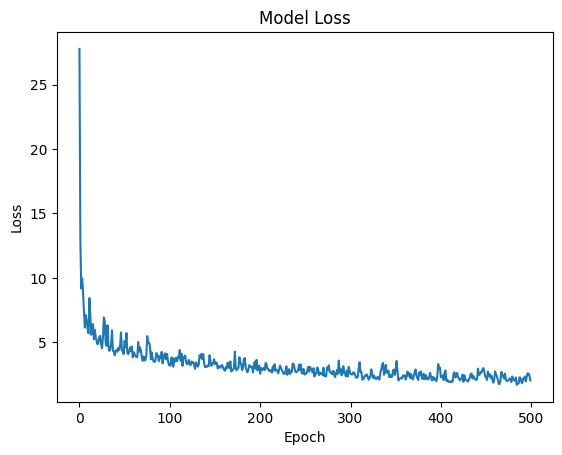

In [47]:
# plot the training loss and validation loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()